In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [11]:
profit = pd.read_csv("50_Startups.csv")

In [3]:
profit.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
profit.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
profit.corr()

C:\Users\sunfa\AppData\Local\Temp\ipykernel_21956\4268351471.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  profit.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


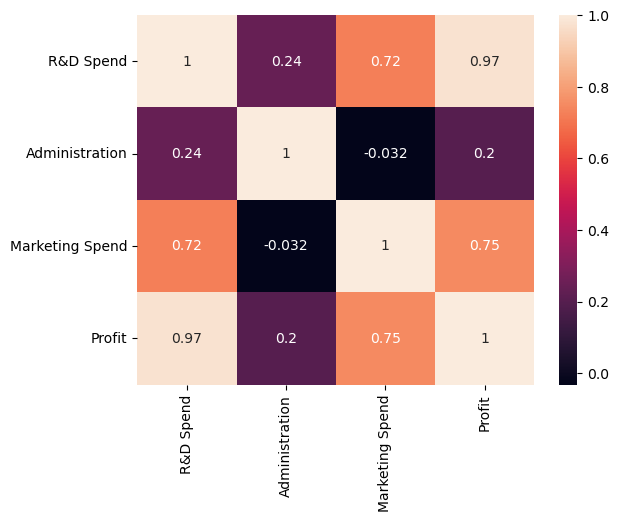

In [12]:
sns.heatmap(data=profit.corr(),annot=True);

In [13]:
features = profit.iloc[:,0:3]   # Extracting the relevant features except for State

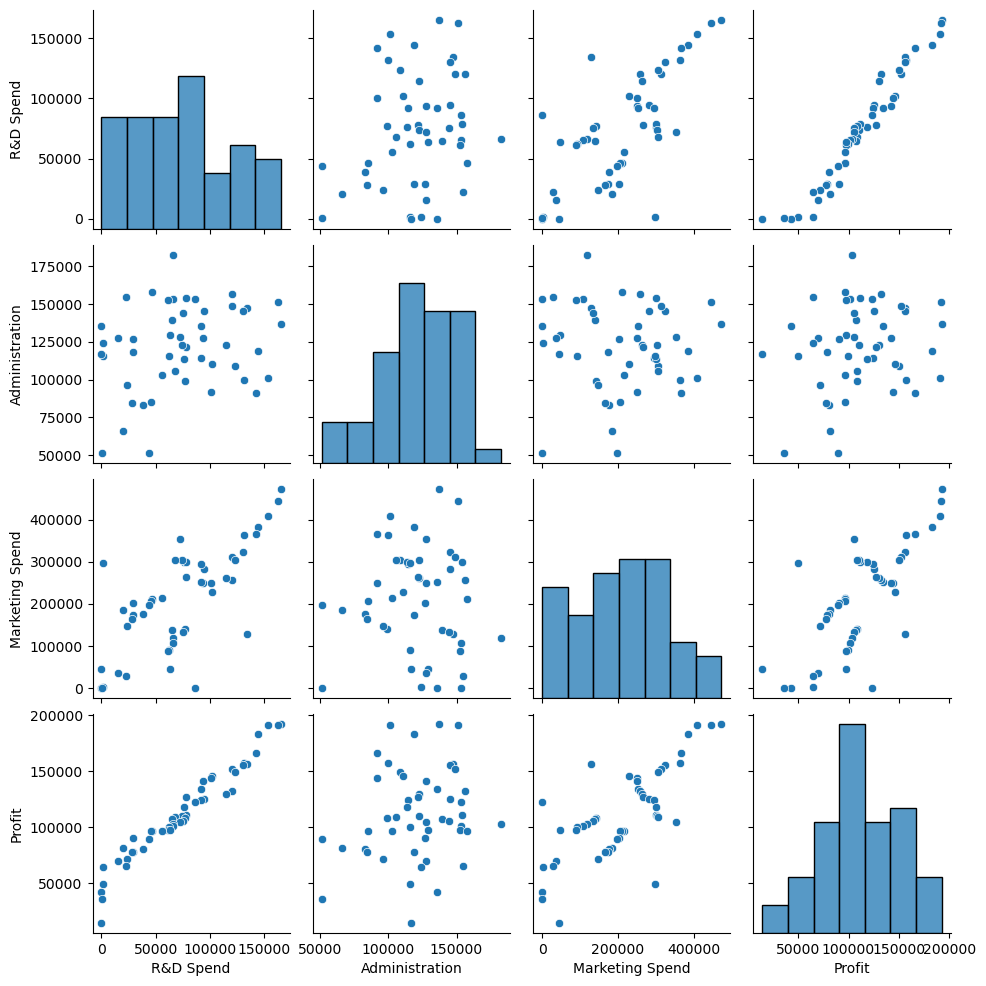

In [14]:
sns.pairplot(profit);

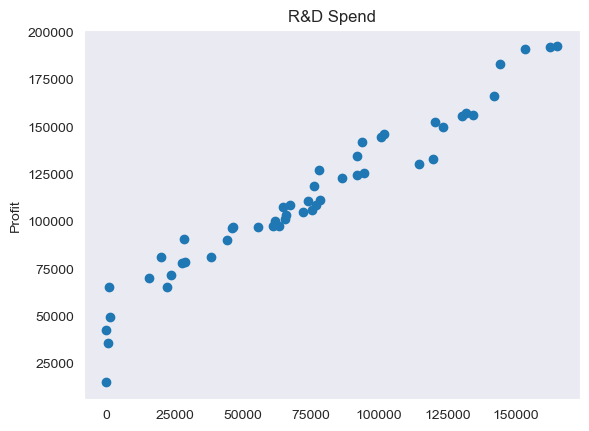

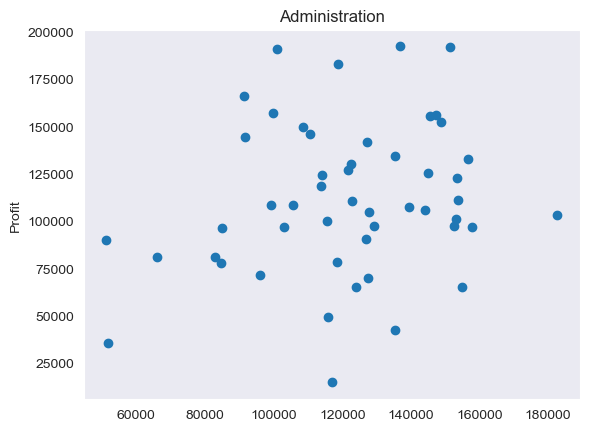

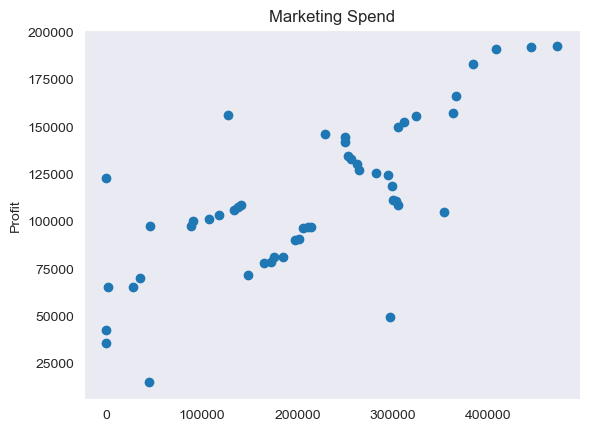

In [175]:
column = list(features.columns)
for i in column:
        plt.scatter(features[i],profit["Profit"])
        plt.title(i)
        plt.ylabel("Profit")
        plt.show()
        
''' Determing relationship of the features wrt to the target : As it is linear regression problem , 
the target and the features shouldbe linearly related and we observe that except for Administration spend , 
R and D spend and Marketting spend is more linear'''

#  Assumption 1 : Testing for Multicollinearity

In [176]:
features.corr()

""" We are now Determining the correlation between the features and observe that R and D spend and Marketting spend is highly 
correlated with the correlation of 72%

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.241955,0.724248
Administration,0.241955,1.000000,-0.032154
Marketing Spend,0.724248,-0.032154,1.000000


<Axes: >

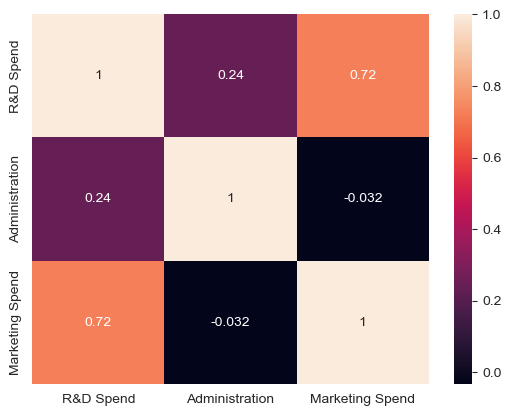

In [177]:
sns.heatmap(data=features.corr(),annot=True)

In [ ]:
# R AND D SPEND AND MARKETING SPEND HAS HIGH CORELLATION

In [178]:
features.shape

(50, 3)

In [179]:
features.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

# Correlation Matrix demonstrates the 2 features are highly correlated

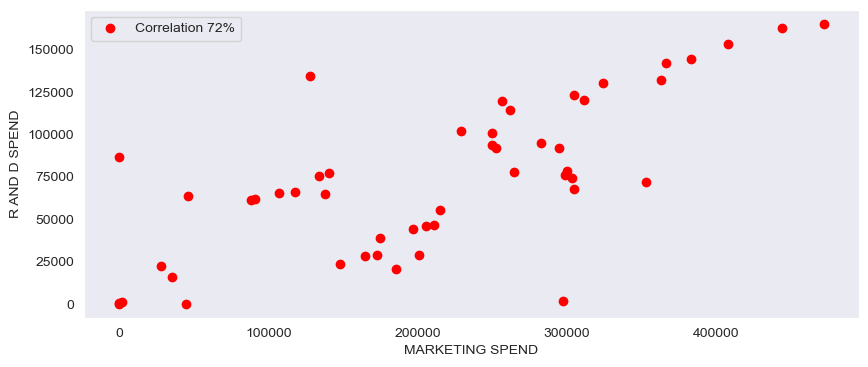

In [181]:
plt.figure(figsize=(10,4))
plt.scatter(features["Marketing Spend"],features["R&D Spend"],color="red",label="Correlation 72%")
plt.xlabel("MARKETING SPEND",size=10)
plt.ylabel("R AND D SPEND",size=10)
plt.legend(loc="best");




#From the above plot , we can infer that the Marketing spend and R and D spend features are highly dependent.
Hence the assumption of the features being independent .

In [182]:
features.info()  # Non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


# Scatterplot between variables along with histograms

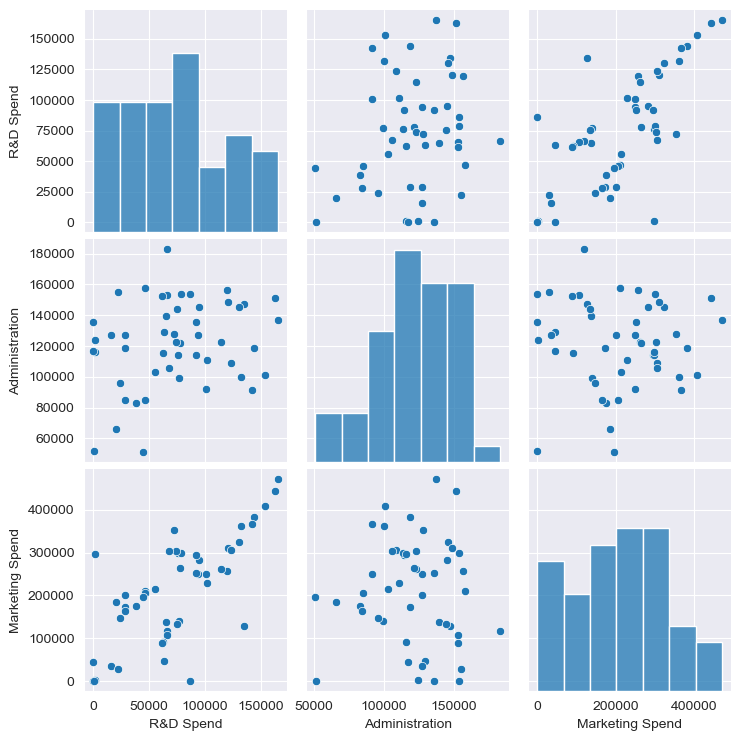

In [185]:
sns.set_style(style = "darkgrid")
sns.pairplot(features);

In [ ]:
''' This Furthermore shows us that the Features show some amount of Linear relationship .
Let us explore some more plotting and try to analyse this after building the model.

# Building the model without any improvments

In [186]:
import statsmodels.formula.api as smf

In [187]:
profit.rename(columns={'R&D Spend': 'Randd_spend', 'Marketing Spend': 'Marketing_spend'}, inplace=True)


In [188]:
profit.isna().sum()

Randd_spend        0
Administration     0
Marketing_spend    0
State              0
Profit             0
dtype: int64

In [189]:
model = smf.ols("Profit~Randd_spend+Administration+Marketing_spend",data=profit).fit()

In [190]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        23:23:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Randd_spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
''' HERE THE MODEL SHOWS 95% R-SQUARED , HOWEVER THE CO EFFICIENTS SEEMS TO BE MISINTERPRETATED 
BECAUSE ALL THE FEATURES ARE POSITVELY LINEARLY DEPENDENT ON THE TARGET VARIABLE AS ON THE PLOT .
HOWEVER THE CO EFFICIENTS SHOW A NEGATIVE LINEAR RELATIONSHIP BETWEEN ADMINISTRATION SPEND and PROFIT, WE FURTHER 
TO WORK ON THE ASSUMPTIONS 

# VIF CALCULATION FOR MULTICOLLINEARITY

AS WE OBSERVED THAT THE FEATURES ARE SLIGHTLY DEPENDENT PN EACH OTHER , HENCE WE CALCULATE VIF .

VIF, or Variance Inflation Factor, is a statistical measure used in the context of Multiple Linear Regression (MLR) to assess multicollinearity among predictor variables. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it challenging to determine the individual effect of each variable on the dependent variable.

It measures how much the standard errors of the regression coefficients are inflated because of the presence of correlated predictors.

If VIF is equal to 1, it indicates no multicollinearity.

If VIF is greater than 1, it suggests some level of multicollinearity.

The higher the VIF, the more severe the multicollinearity.

A commonly used threshold to identify problematic multicollinearity is a VIF greater than 5 or 10

In [193]:
r_randd =smf.ols("(Randd_spend)~(Administration)+(Marketing_spend)",data=profit).fit().rsquared
r_vif = 1/(1-r_randd)

In [194]:
admin =smf.ols("(Administration)~(Randd_spend)+(Marketing_spend)",data=profit).fit().rsquared
admin_vif = 1/(1-admin)

In [195]:
marketing =smf.ols("(Marketing_spend)~(Administration)+(Randd_spend)",data=profit).fit().rsquared
marketing_vif = 1/(1-marketing)

In [196]:
vif_frame = pd.DataFrame({"Segments" : ["R&D_SPEND","ADMIN_SPEND","MARKETING_SPEND"],"VIF" : [r_vif,admin_vif,marketing_vif]} )

In [197]:
vif_frame

,Segments,VIF
0,R&D_SPEND,2.468903
1,ADMIN_SPEND,1.175091
2,MARKETING_SPEND,2.326773


#The VIF values for all the features are  below the commonly used thresholds of 5 or 10.
Generally, VIF values less than 5 are considered acceptable, and values between 5 and 10 
indicate moderate multicollinearity. In your case, all VIF values are below 2, which suggests 
low multicollinearity among these features. 

This is a positive sign because low multicollinearity
makes it easier to interpret the coefficients of these features in a regression model.

#   WE DONT HAVE TO TREAT FOR MULTICOLLINEARITY AS THE VIF IS LOW

# Assumption 2 : Residual Analysis to determine if the errors are normally distributed with mean 0


In [ ]:
# THE QQ PLOT SHOULD PROVIDE A NORMAL DISTRIBUTION OF WITH THE MEAN OF 0

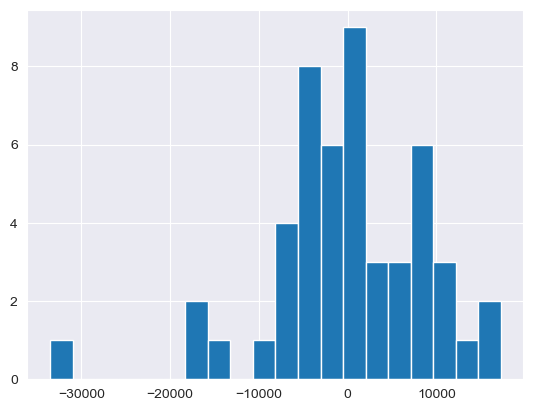

In [199]:
plt.hist(model.resid,bins=20);


THIS IS NOT A BELL SHAPED CURVE 
Here we observe that the errors are not normally distribution around the mean of 0 
.Hence the model requires transformations

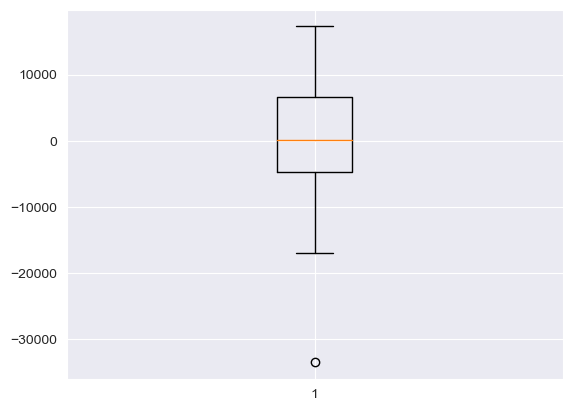

In [200]:
plt.boxplot(model.resid);

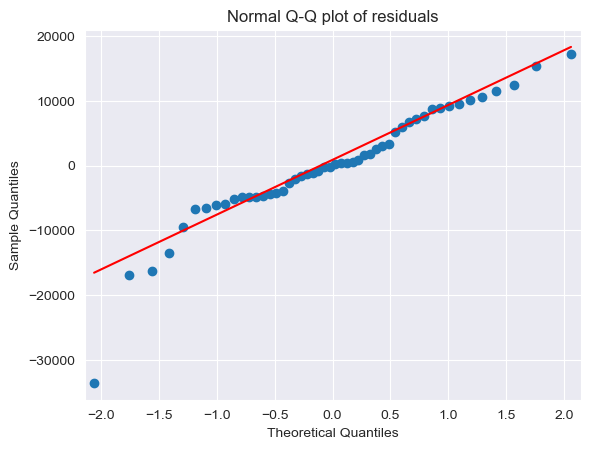

In [201]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Assumption 3 : Checking for Homoscedasticity


Creating a scatterplot of standardized values of the fitted values (predicted values) and the residuals (prediction errors) from the model. This scatterplot is often referred to as a "residual plot,"

If the scatterplot shows no clear pattern, and the points are randomly scattered around a horizontal line, it suggests that the assumption of homoscedasticity is met.

Variance of the residuals is approximately constant.

Firstly we must STANDARISED THE VALUES FOR PLOTTING.

In [202]:
def standardised_values(vals):
    return (vals - vals.mean())/vals.std()  # calculates their z-scores (standardized values)


''' Z SCORE = (X - MEAN/SD) : BUT WHY STANDARDISE ? 

#By standardizing both the predicted values and residuals, you can more easily identify patterns or deviations. 
It is ideal for the plot to be scattered randomly without any variation in the errors , 

# If the spread of residuals are widening or narrowing systematically as the predicted values increase or decrease,
it suggests the presence of heteroscedasticity '''

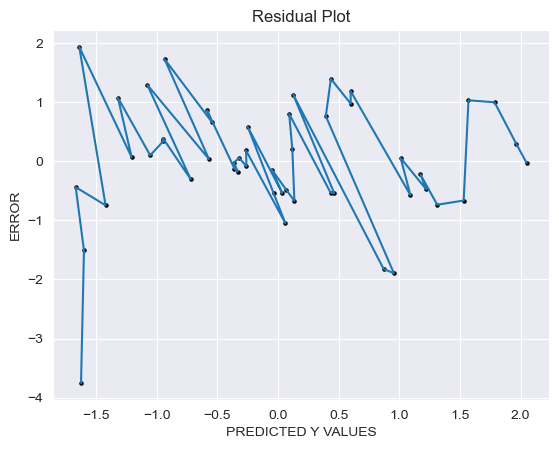

'THERE IS ONE POTENTIAL OUTLIER WHICH CAN BE IGNORED GIVEN THE SIZE OF THE DATA IS JUST 50 .\nALSO THE ERRORS ARE NOT EXACTLY CONTANT , THERE IS SOME LEVEL OF VARIATION IN THR ERRORS'

In [217]:
plt.scatter(standardised_values(model.fittedvalues),standardised_values(model.resid),s=5,c="black")
plt.plot(standardised_values(model.fittedvalues),standardised_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("PREDICTED Y VALUES")
plt.ylabel("ERROR")
plt.show()

'''THERE IS ONE POTENTIAL OUTLIER WHICH CAN BE IGNORED GIVEN THE SIZE OF THE DATA IS JUST 50 .
ALSO THE ERRORS ARE NOT EXACTLY CONTANT , THERE IS SOME LEVEL OF VARIATION IN THR ERRORS'''


# Assumption 4: ERROR AND FEATURE SHOULD BE INDEPENDENT 

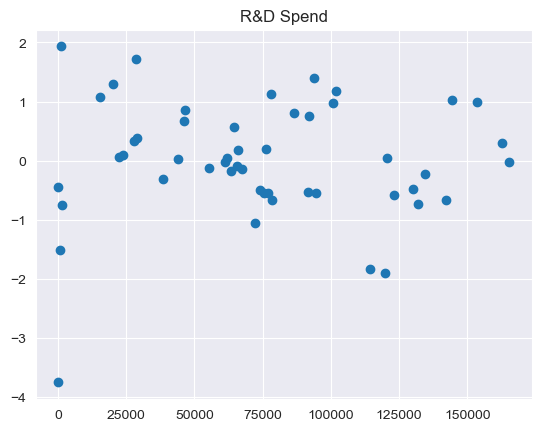

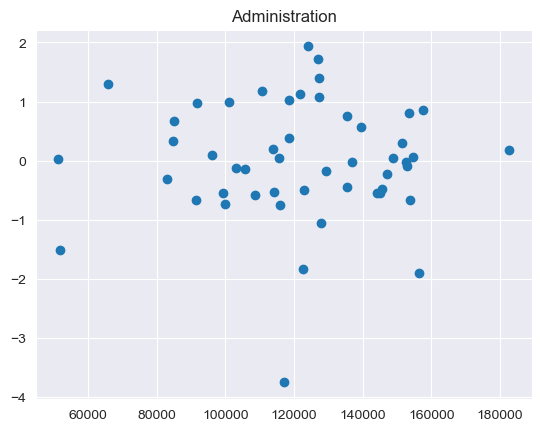

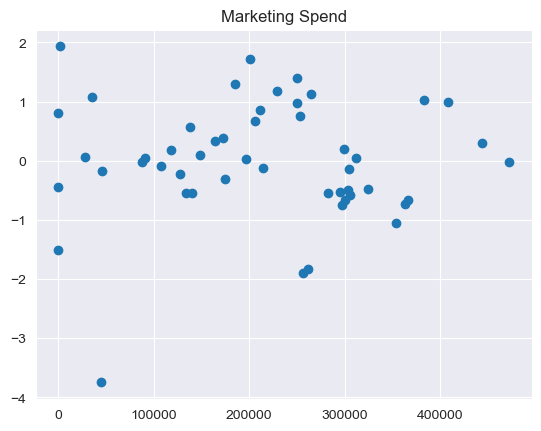

In [206]:
cols = list(features.columns)
for i in cols:
        plt.scatter(features[i],standardised_values(model.resid))
        plt.title(i)
        plt.show()
        \
'''AS OBSERVED IN THE PLOTS THE ERRORS ARE INDEPENDENT OF THE FEATURES . AS ITS A RANDOM SCATTER PLOT AND NOT A LINEAR PLOT'''

# Cooks Distance for Outlier detection 

In [207]:
model_influence = model.get_influence()
(c,_)  = model_influence.cooks_distance


'''_ is used as a convention to "throw away" or
ignore the second element of the tuple returned by model1_influence.cooks_distance. 
This is often done when you are interested in only one value from a function that returns a tuple of multiple values'''

In [208]:
features.shape

(50, 3)

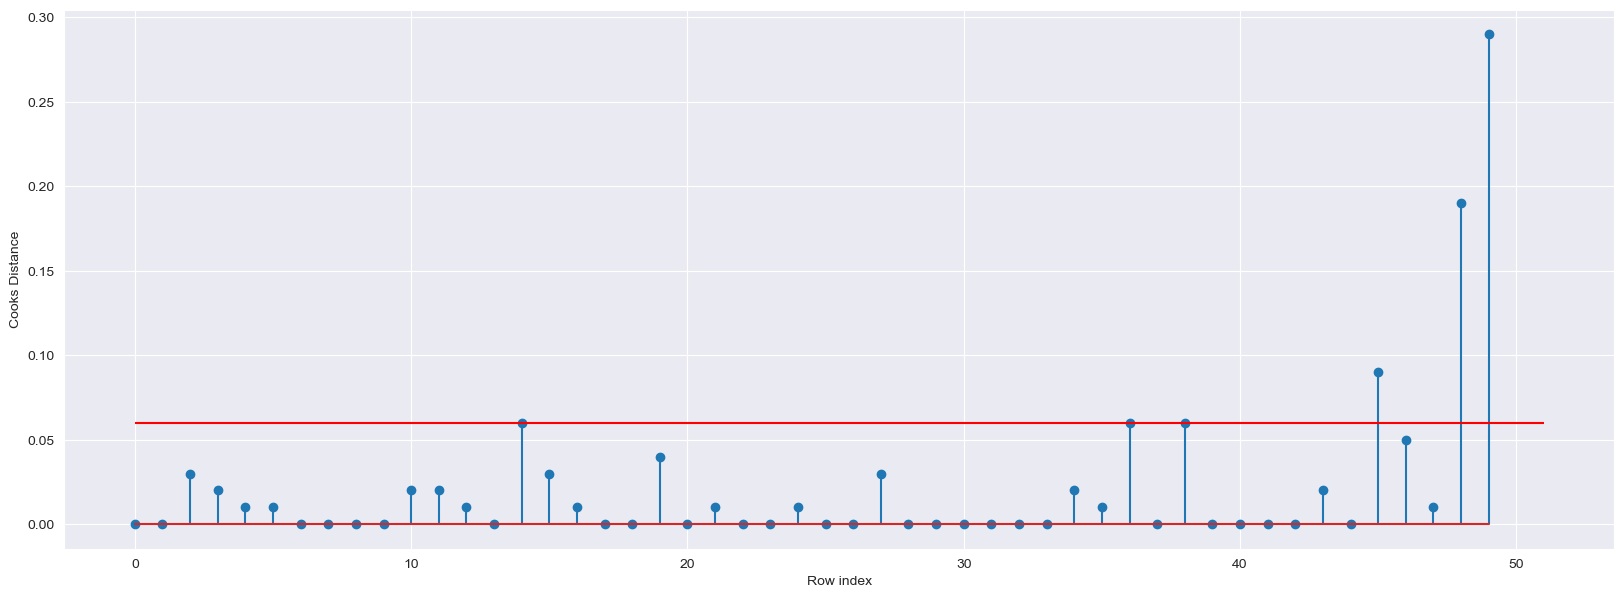

In [209]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(features)), np.round(c, 2))
plt.hlines(y=0.06,xmin=0,xmax=51,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

''' We observe a some potential Outliers that could tamper the model performance'''

# IMPROVIZATIONS ON THE MODEL WITH TRANSFORMATIONS/TREATMENT

In [225]:
model2 = smf.ols("np.sqrt(Profit)~(Randd_spend)+np.log(Administration)+np.cbrt(Marketing_spend)",data=profit).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           5.33e-23
Time:                        00:23:59   Log-Likelihood:                -221.52
No. Observations:                  50   AIC:                             451.0
Df Residuals:                      46   BIC:                             458.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  206.1224    139.946      1.473      0.148     -75.573     487.818
Randd_spend                  0.0012   8.76e-05     14.130      0.000       0.001       0.001
np.log(Administration)       0.8745     11.972      0.073      0.942     -23.224      24.973
np.cbrt(Marketing_spend)     0.3815      0.205      1.863      0.069      -0.031       0.794
==============================================================================
Omnibus:                       59.032   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.376
Skew:                          -2.930   Prob(JB):                    3.60e-104
Kurtosis:                      16.940   Cond. No.                     4.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
model3 = smf.ols("np.sqrt(Profit)~(Randd_spend)+np.sqrt(Administration)+np.sqrt(Marketing_spend)",data=profit).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           6.41e-23
Time:                        00:24:06   Log-Likelihood:                -221.72
No. Observations:                  50   AIC:                             451.4
Df Residuals:                      46   BIC:                             459.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  216.5483     27.664      7.828      0.000     160.863     272.234
Randd_spend                  0.0012   9.45e-05     12.978      0.000       0.001       0.001
np.sqrt(Administration)      0.0100      0.076      0.131      0.896      -0.143       0.163
np.sqrt(Marketing_spend)     0.0423      0.024      1.743      0.088      -0.007       0.091
==============================================================================
Omnibus:                       57.302   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.497
Skew:                          -2.852   Prob(JB):                     2.44e-93
Kurtosis:                      16.122   Cond. No.                     7.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
model4 = smf.ols("np.log(Profit)~(Randd_spend)+np.sqrt(Administration)+np.sqrt(Marketing_spend)",data=profit).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     51.37
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.00e-14
Time:                        00:25:31   Log-Likelihood:                 4.8008
No. Observations:                  50   AIC:                            -1.602
Df Residuals:                      46   BIC:                             6.047
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.6940      0.298     35.875      0.000      10.094      11.294
Randd_spend               7.719e-06   1.02e-06      7.578      0.000    5.67e-06    9.77e-06
np.sqrt(Administration)      0.0003      0.001      0.388      0.700      -0.001       0.002
np.sqrt(Marketing_spend)     0.0004      0.000      1.518      0.136      -0.000       0.001
==============================================================================
Omnibus:                       77.066   Durbin-Watson:                   0.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1070.203
Skew:                          -4.044   Prob(JB):                    4.06e-233
Kurtosis:                      24.173   Cond. No.                     7.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# RESIDUAL ERROR ASSUMPTION SATISFIED

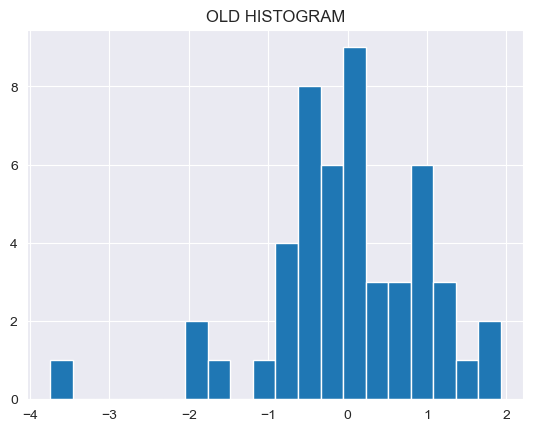

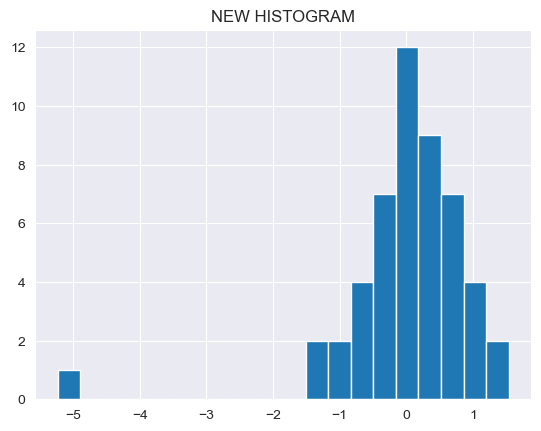

In [213]:
plt.hist(standardised_values(model.resid),bins=20);
plt.title("OLD HISTOGRAM")
plt.show()

plt.hist(standardised_values(model3.resid),bins=20);
plt.title("NEW HISTOGRAM")
plt.show()

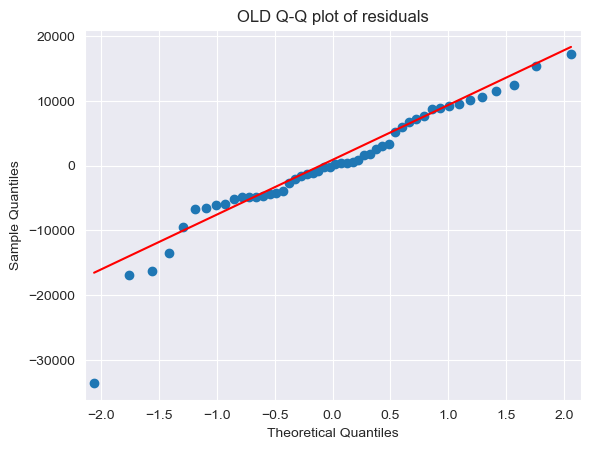

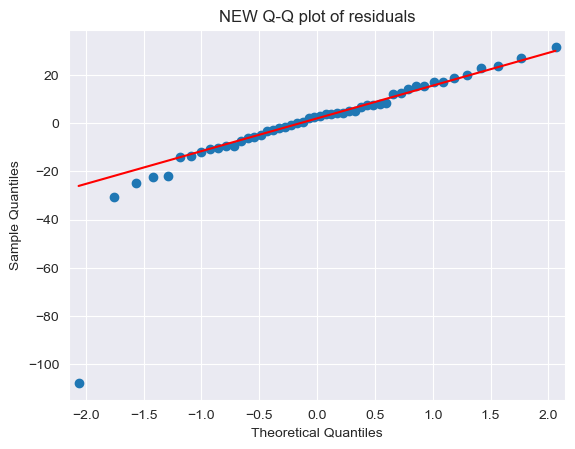

In [215]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("OLD Q-Q plot of residuals")
plt.show()


qqplot=sm.qqplot(model3.resid,line='q') 
plt.title("NEW Q-Q plot of residuals")
plt.show()

# Check for Homoscedasticity assumption satisfied

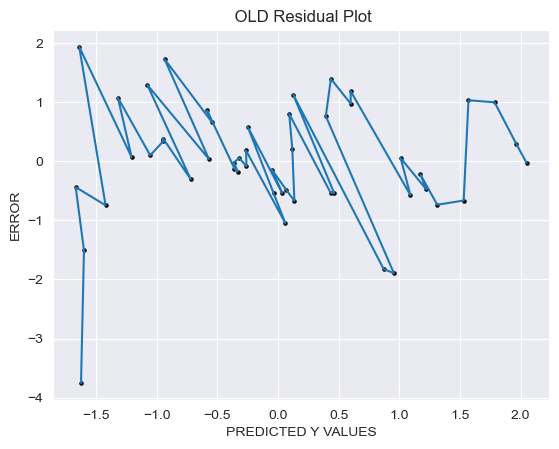

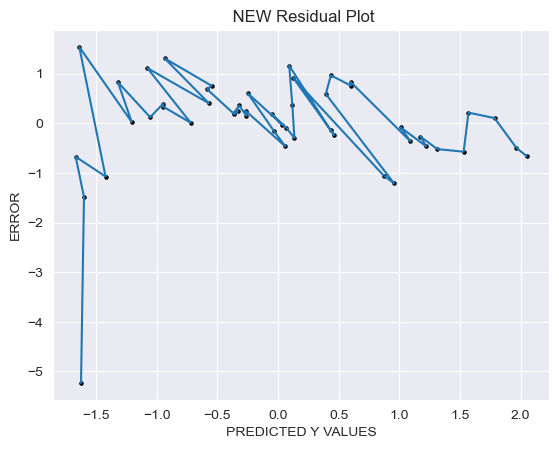

In [218]:
plt.scatter(standardised_values(model.fittedvalues),standardised_values(model.resid),s=5,c="black")
plt.plot(standardised_values(model.fittedvalues),standardised_values(model.resid))
plt.title(" OLD Residual Plot")
plt.xlabel("PREDICTED Y VALUES")
plt.ylabel("ERROR")
plt.show()


plt.scatter(standardised_values(model.fittedvalues),standardised_values(model3.resid),s=5,c="black")
plt.plot(standardised_values(model.fittedvalues),standardised_values(model3.resid))
plt.title(" NEW Residual Plot")
plt.xlabel("PREDICTED Y VALUES")
plt.ylabel("ERROR")
plt.show()

# Cooks Distance comparsion with the new model after transformations

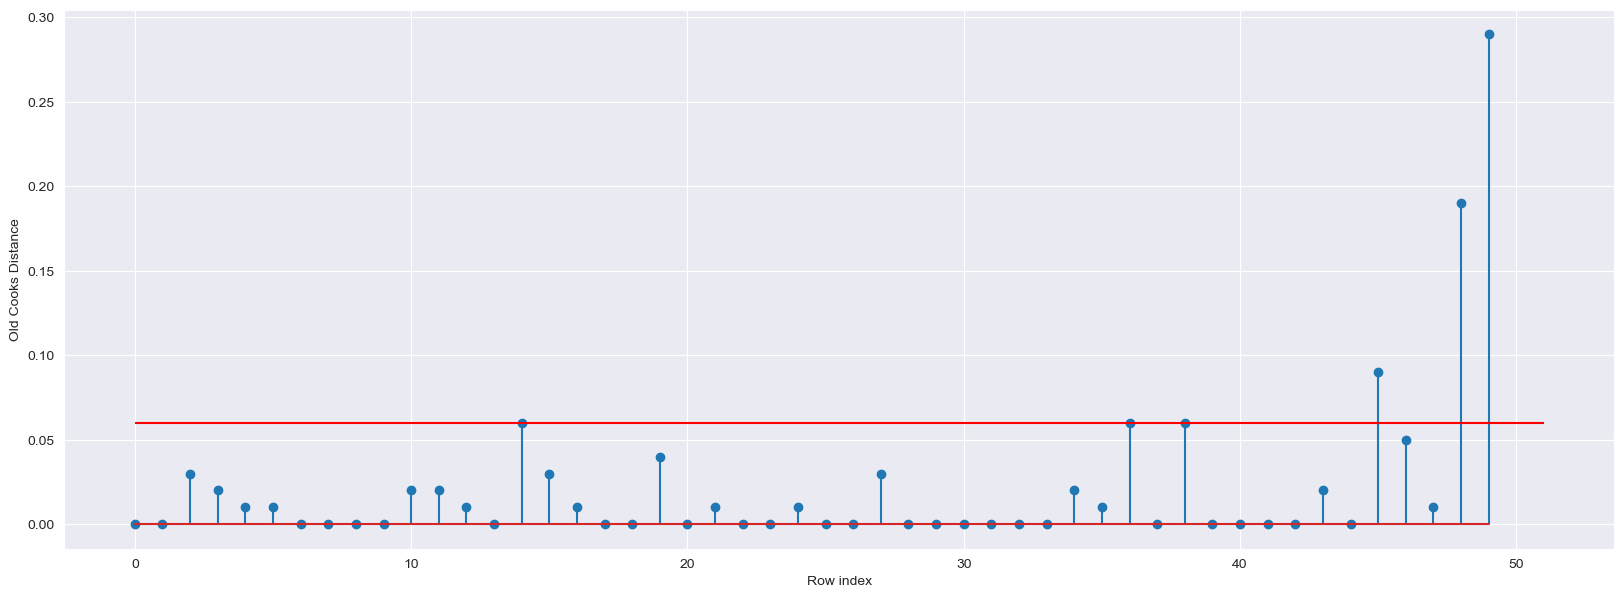

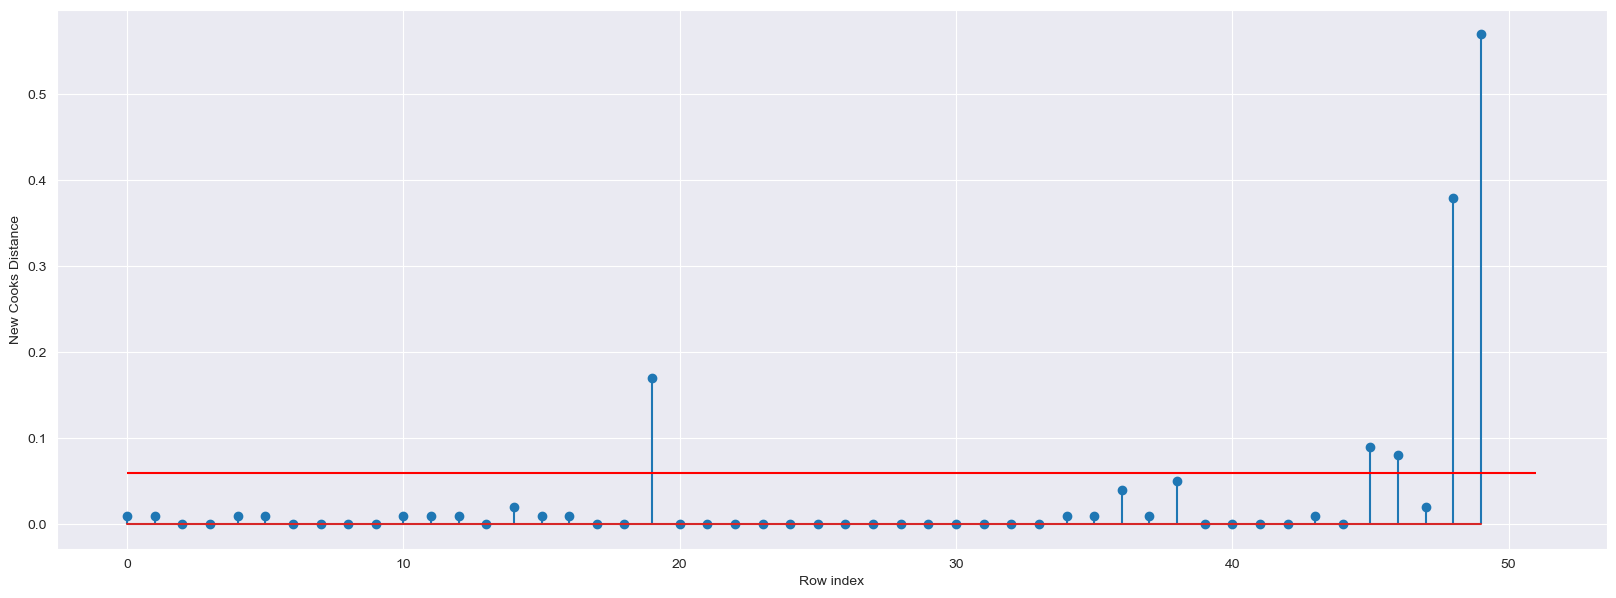

In [220]:
model_influence = model.get_influence()
(c,_)  = model_influence.cooks_distance

fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(features)), np.round(c, 2))
plt.hlines(y=0.06,xmin=0,xmax=51,color="red")
plt.xlabel('Row index')
plt.ylabel('Old Cooks Distance')
plt.show()



model3_influence = model3.get_influence()
(c,_)  = model3_influence.cooks_distance

fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(features)), np.round(c, 2))
plt.hlines(y=0.06,xmin=0,xmax=51,color="red")
plt.xlabel('Row index')
plt.ylabel('New Cooks Distance')
plt.show()

In [231]:
Models = pd.DataFrame({"Model" : ["Model1","Model2","Model3","Model4"] , "R_Squared" : [model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared]})
Models

,Model,R_Squared
0,Model1,0.950746
1,Model2,0.899916
2,Model3,0.899110
3,Model4,0.770139


In [ ]:
''' SUMMARY : THE MODEL'S PERFORMANCE IS AT 0.899 WITH CORRECTLY INTERPRETATED CO EFFICIENTS WITH THE HELP OF TRANSFORMATIONS 
THOUGH THE MODEL WITHOUT TRANSFORMATIONS YEILDED AN RESULT OF 95% . IT SIGNIFICANTLY DID NOT SATISFY THE MLR ASSUMPTIONS AND 
HENCE WE HAD TO TWEAK IT A LITLLE BIT . IT IS OK TO LET GO OF THE MODEL'S PERFORMANCE BY A SMALL EXTENT THAN TO HAVE A 
MISINTERPRETED MODEL'''